In [1]:
import pandas as pd
import ast

In [2]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
def convert_list(string):
    try:
        return ast.literal_eval(string)
    except:
        return []

In [27]:
import re
def strip(s):
    s=' '.join(s.split())
    return re.sub(r'[^A-Za-z0-9 ]+', '', s)

In [41]:
df=pd.read_csv("ss+all.csv")

In [46]:
df=df.drop_duplicates("title")

In [47]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.85, min_df=0.02)


In [48]:
df=df.fillna("")

In [49]:
df=df[df["text"]!=""]

In [50]:
X = vectorizer.fit_transform(df["text"])


In [51]:
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
df_bow_sklearn["art_title"]=df["title"]
tfidf=df_bow_sklearn.set_index("art_title")

In [52]:
tfidf.to_csv("tfidf_eng.csv")

In [53]:
df["subj"]=df["tag_clean"].apply(convert_list)

In [54]:
emp=0
tot=0
num=0
for t in df["subj"]:
    if len(t)==0:
        emp+=1
    num+=len(t)
    tot+=1

In [57]:
updated=[]
subj=[]
for g in df["subj"]:
    temp=set()
    for i in g:
        temp.add(i)
        subj.append(i)
    updated.append(temp)

In [58]:
top=list(pd.Series(subj).value_counts().head(80).index)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [60]:
model = LogisticRegression(solver='liblinear', random_state=0)


In [61]:
df=df.set_index("title")

In [62]:
tfidf=tfidf.T

Train models for each of the top subjects

In [63]:

genre_scores=pd.DataFrame()
for gen in top:
    y=[]
    for b in tfidf.columns:
        genre_in=df["subj"][b]
        if gen in genre_in:
            y.append(1)
        else:
            y.append(0)
    X, y = oversample.fit_resample(tfidf.T, y)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    model.fit(x_train, y_train)
    print(gen)
    print(model.score(x_test, y_test))
    genre_scores[gen]=model.predict_proba(tfidf.T)[:,1]

arts
0.9077679449360865
philosophy
0.9257020974049058
literature
0.9117915071988336
applied philosophy
0.9402832281180686
information science
0.9367431485022307
computer science
0.9345135516214946
social sciences
0.9448082319925164
education
0.9455168119551681
medicine
0.973855198019802
biology
0.9592277992277992
biological sciences
0.9525496841780927
informetrics
0.9504476690336524
applied sciences
0.9485959797452815
linguistics
0.9747182455071581
law
0.9693690947881743
art history
0.9665291150848234
engineering
0.9572662524624943
political science
0.9633777239709443
performing arts
0.9773002421307506
psychology
0.9764065335753176
communications
0.9663345410628019
information resources
0.9599038894728938
business
0.9753531710249475
astronomy
0.9866726564839773
metaphysics
0.9886091127098321
economics
0.985172981878089
epistemology
0.9820197782439317
computer law
0.9761976047904192
physical sciences
0.9837070254110613
physics
0.9941799731383376
religion
0.9868872001192073
information m

In [6]:
#tfidf=pd.read_csv("tfidf_eng.csv")

In [15]:
tfidf=tfidf.set_index("title")

In [17]:
tfidf=tfidf.T

In [20]:
df=df.set_index("title")

Train and examine specific subject model

In [79]:
y=[]
for b in tfidf.columns:
    genre_in=df["subj"][b]
    if "philosophy" in genre_in:
        y.append(1)
    else:
        y.append(0)
X, y = oversample.fit_resample(tfidf.T, y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))


0.9223249200142197


In [81]:
import numpy as np

In [82]:
importance = model.coef_[0]
imp=np.argsort(importance)
words=list(tfidf.T.columns)

In [83]:
for i in range(0,20):
    print(words[imp[i]]+ " "+ str(importance[imp[i]]))

art -2.058819068215304
poetry -1.986016931061024
google -1.9080148648430921
facebook -1.7714167081212595
online -1.7069975296528972
figure -1.6952864159390157
fig -1.6818869711105815
english -1.6489770502038286
video -1.607322092123857
al -1.5607351638224598
services -1.5519565335628642
access -1.5133634486106753
food -1.4850240278365194
journal -1.4649413709184271
characters -1.4618122309341401
years -1.4356626461950002
media -1.4325120886398903
data -1.425071916511632
song -1.4020888609285853
corpus -1.3694992689416312


In [85]:
for i in range(-1,-20, -1):
    print(words[imp[i]]+ " "+ str(importance[imp[i]]))

political 4.324894386499909
contempt 3.2854606637484003
theory 3.2017520340679386
politics 3.1489588442082574
philosophy 2.8954513897927576
workers 2.652739380482194
moral 2.5802617672806827
bayesian 2.4997668475804895
radical 2.495726886247827
human 2.4263118938346326
public 2.409071719319682
psychology 2.3741518846523837
social 2.363230457294603
freedom 2.3489990711123085
government 2.2958142190042174
propositional 2.2685437717044405
labor 2.177712656039753
power 2.151347832353556
state 2.1326355906002212


In [86]:
predictions = model.predict_proba(tfidf.T)


In [87]:
predictions = model.predict_proba(tfidf.T)
conf=predictions[:,1]
s_conf=np.argsort(conf)
titles=list(tfidf.columns)

In [89]:
for i in range(0,2000):
    if y[s_conf[i]]==1:
        print(titles[s_conf[i]]+ " "+ str(conf[s_conf[i]]))

Digital Tools for Qualitative
                    Research 0.031440085706697346


In [90]:
for i in range(-1,-1000, -1):
    if y[s_conf[i]]==0:
        print(titles[s_conf[i]]+ " "+ str(conf[s_conf[i]]))

The SAGE Handbook of Political Sociology: Two Volume Set 0.9999845902408248
The SAGE Handbook of Frankfurt School Critical Theory 0.9998166170768803
The SAGE Handbook of Marxism 0.9997027214477003
Identity Politics in India and Europe 0.9985996499508786
Key Concepts in International Relations 0.9979931551923819
URPE, Radical Political Economics, Social Movements, and Revolution—From Identity Politics to Solidarity Economics: Looking Backward, Looking Forward on the Occasion of URPE’s Fiftieth Anniversary 0.9925029701744554
"The Sense of Liberty": Rethinking Liberalism and Sentimentality in Harriet Beecher Stowe's Antislavery Fiction 0.9873826352405194
Discourse and Political Culture 0.9869291279529598
political communication and deliberative democracy 0.9825224603002786
Political Communication and Deliberation 0.9807427710150597
Human Rights Responsibility of Multinational Corporations, Political Ecology of Injustice: Learning from Bhopal Thirty Plus? 0.9780090892560196
Policy Feedback

In [64]:
genre_scores["title"]=df.index
genre_scores=genre_scores.set_index("title")

In [65]:
genre_scores.to_csv("subj.csv")

In [5]:
genre_scores=pd.read_csv("subj.csv")

In [67]:
gs=genre_scores.T

In [69]:
gs["cohort succession explains most change in literary culture"].sort_values(ascending=False).head(20)

biology                  0.581711
information resources    0.460475
biological sciences      0.446896
informetrics             0.420153
applied mathematics      0.342360
astronomy                0.336033
art                      0.314419
information science      0.279654
history                  0.224786
physical sciences        0.173932
medicine                 0.158344
mathematics              0.144654
epistemology             0.143521
psychology               0.141427
literature               0.135257
sociology                0.132196
computer science         0.126044
formal education         0.122388
arts                     0.119554
social sciences          0.115715
Name: cohort succession explains most change in literary culture, dtype: float64

In [73]:
corr_matrix = genre_scores.iloc[:, : 30].corr()

In [74]:
import seaborn as sn
import matplotlib.pyplot as plt

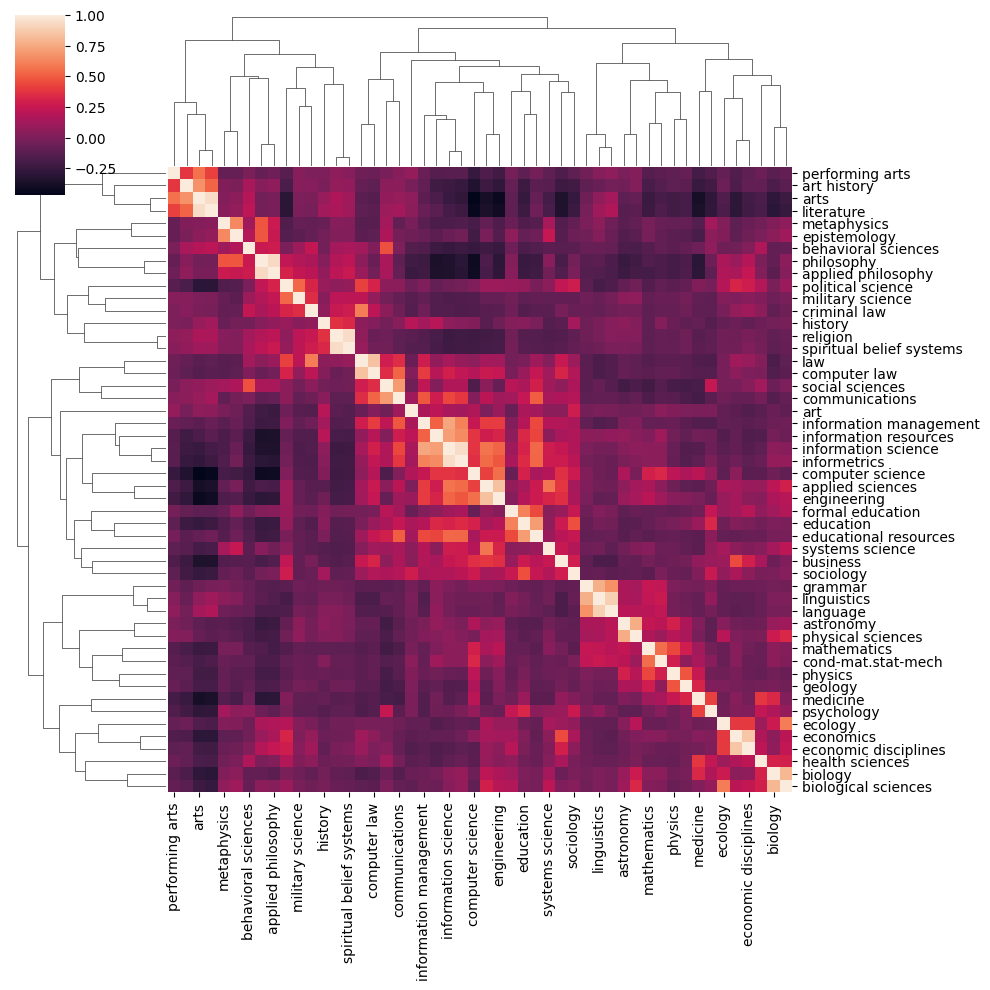

In [78]:
corr_matrix = genre_scores.iloc[:, : 50].corr()
sn.clustermap(corr_matrix, yticklabels=True)
plt.show()